In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df = pd.read_csv("../PROJECT-1/clean_data.csv",encoding='latin1')
df

,sex,fatal (y/n),activity,time of the day
0,F,N,Paddling,Evening
1,M,N,Surfing,Morning
2,M,N,Walking,Evening
3,M,N,Standing,Afternoon
4,M,N,Swimming,Afternoon
...,...,...,...,...
1321,M,Y,Wreck of the steamship Birkenhead,Night
1322,M,Y,Bathing,Afternoon
1323,M,N,Conch diver,Afternoon
1324,M,Y,Swimming,Night


#### En base al data set ya procesado que tenemos, calculamos la tasa de mortalidad en base a las tres variables establecidas


In [26]:
#contamos el numero de ataques
gender_counts = df['sex'].value_counts()
#agrupamos con lambda el numero por genero y contamos cuantos fueron fatales
mortal_gender_counts = df.groupby('sex')['fatal (y/n)'].apply(lambda x: (x == 'Y').sum())
#calculamos el porcentaje
mortality_gender = (mortal_gender_counts / gender_counts) * 100

mortality_gender

F    14.473684
M    23.861566
dtype: float64

Text(0.5, 0, 'Mortality Rate (%)')

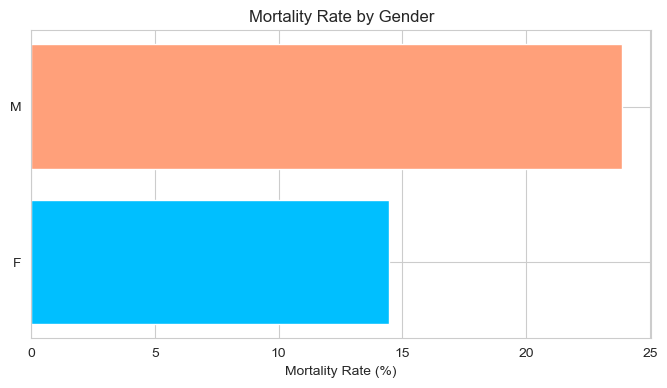

In [73]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(mortality_gender.index, mortality_gender.values, color=['#00BFFF', '#FFA07A'])#00BFFF
ax.set_title('Mortality Rate by Gender')
ax.set_xlabel('Mortality Rate (%)')

In [28]:
#contamos el numero de ataques
time_counts = df['time of the day'].value_counts()
#agrupamos con lambda el numero por franja y contamos cuantos fueron fatales
mortal_time_counts = df.groupby('time of the day')['fatal (y/n)'].apply(lambda x: (x == 'Y').sum())
#calculamos el porcentaje
mortality_time = (mortal_time_counts / time_counts) * 100

mortality_time

Afternoon    23.824959
Evening      17.488789
Morning      21.739130
Night        34.615385
dtype: float64

Text(0.5, 0, 'Mortality Rate (%)')

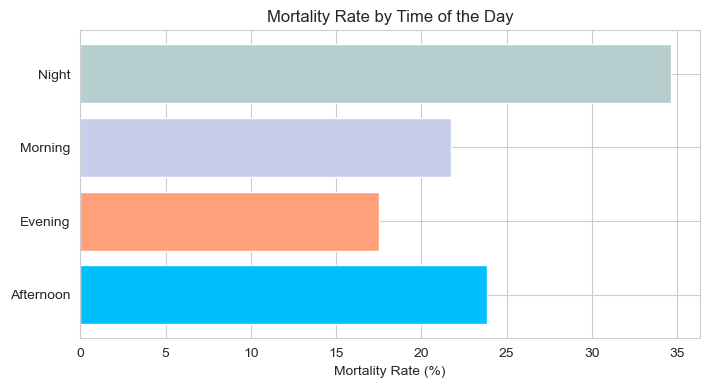

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(mortality_time.index, mortality_time.values, color=['#00BFFF', '#FFA07A','#C7CEEA','#B7CECE'])
ax.set_title('Mortality Rate by Time of the Day')
ax.set_xlabel('Mortality Rate (%)')

In [71]:
#Seleccionamos los datos de los ataques mortales
mortal_df = df[df['fatal (y/n)'] == 'Y']
# Calculamos el número de ataques mortales de tiburón para cada actividad
mortal_activity_counts = mortal_df['activity'].value_counts().head(15)
# Calculamos el porcentaje de ataques mortales de tiburón para cada actividad en términos del número total de ataques mortales de tiburón
mortality_activity = (mortal_activity_counts / mortal_activity_counts.sum()) * 100

mortality_activity

Swimming            34.705882
Surfing             14.705882
Spearfishing         7.647059
Body boarding        7.647059
Bathing              5.294118
Swimming             5.294118
Snorkeling           4.117647
Treading water       3.529412
Wading               2.941176
Standing             2.941176
Diving               2.941176
Body surfing         2.941176
Scuba diving         2.352941
Windsurfing          1.764706
Lifesaving drill     1.176471
Name: activity, dtype: float64

Text(0.5, 1.0, 'Percentage of Shark Attack Incidents by Activity')

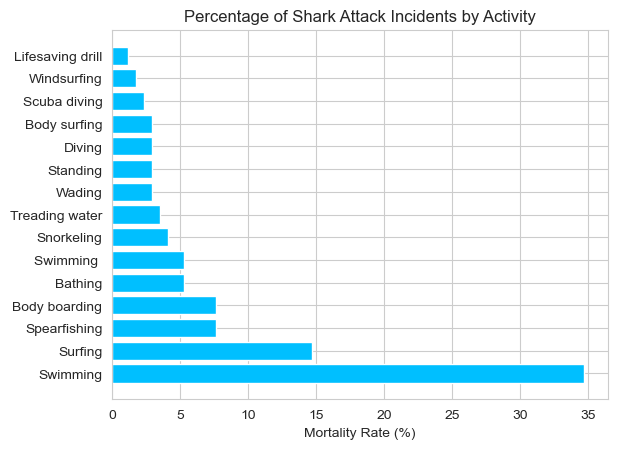

In [74]:
fig,plt.barh(mortality_activity.index, mortality_activity.values, color='#00BFFF')
plt.xlabel('Mortality Rate (%)')
plt.title('Percentage of Shark Attack Incidents by Activity')